# 1/ Importation du jeu de données


In [4]:
# Importation du jeu de données
import pandas as pd

# Charger le fichier CSV
df_francais = pd.read_csv('/content/francais_10000.csv')

# Afficher les premières lignes du DataFrame
print(df_francais.head())

                                            JOB_NAME  \
0  STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...   
1          Responsable d'agence / City Manager (H/F)   
2  Développeur(se) Confirmé(e) Fullstack JS (Node...   
3  💡 Business Consultant(e)  MOA - Transformation...   
4                          Junior Business Developer   

                                     JOB_DESCRIPTION  \
0  **DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...   
1  Pour continuer à offrir un service de qualité ...   
2  * Conception et choix d’architecture\r\n* Déve...   
3  **Consultant Junior en transformation digitale...   
4  * Contrat : Stage\r\n* Temps de travail : Temp...   

                                             PROFILE IS_JOB_REMOTE  \
0  Vous recherchez un projet innovant et excitant...            no   
1  * Bac+3 minimum\n    \n* Une première expérien...      punctual   
2  * Formation en informatique ou en ingénierie o...       partial   
3  Vous avez le sens de l’analyse et l’envie d

# 4/ Prétaitement du Texte


In [5]:
df_concat=df_francais

In [6]:
df_concat.shape

(8062, 12)

In [7]:
df_concat.dtypes

JOB_NAME                      object
JOB_DESCRIPTION               object
PROFILE                       object
IS_JOB_REMOTE                 object
Job_presentation              object
JOB_NAME_length                int64
JOB_DESCRIPTION_length         int64
PROFILE_length                 int64
Job_presentation_length        int64
langue                        object
Job_presentation_processed    object
Sentence_length                int64
dtype: object

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter



# Prétraitement du texte
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('french'))
lemmatizer = WordNetLemmatizer()

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Définir les mots vides
stop_words = set(stopwords.words('french'))

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement du texte

def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    
    # Supprimer la ponctuation et les caractères spéciaux
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    
    # Tokenization des mots
    tokens = word_tokenize(text)
    
    # Supprimer les mots vides
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatisation des mots
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Appliquer la fonction de prétraitement sur la colonne 'Job_presentation'
df_concat['Job_presentation_processed'] = df_concat['Job_presentation'].apply(preprocess_text)


# Calculer la fréquence des mots
word_freq = Counter()
for tokens in df_concat['Job_presentation_processed']:
    word_freq.update(tokens)

# Afficher les 10 mots les plus fréquents
print(word_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[('client', 13591), ('mission', 9670), ('plus', 7519), ('dune', 7390), ('gestion', 7144), ('développement', 6669), ('équipe', 6535), ('service', 6068), ('expérience', 6032), ('formation', 5848)]


In [9]:
df_concat['Job_presentation_processed'][0]

['stagiaire',
 'ingenieur',
 'generaliste',
 'projet',
 'erp',
 'hf',
 'description',
 'poste',
 'sein',
 'léquipe',
 'production',
 'travaillerez',
 'mission',
 'suivantes',
 'collaboration',
 'ingénieur',
 'polyvalent',
 'simprégner',
 'fonctionnement',
 'lentreprise',
 'différents',
 'flux',
 'comprendre',
 'enjeux',
 'dun',
 'erp',
 'entreprise',
 'documenter',
 'manière',
 'précise',
 'lensemble',
 'données',
 'lerp',
 'renseignement',
 'stratégie',
 'gestion',
 'stock',
 'selon',
 'type',
 'darticle',
 'documenter',
 'tutoriels',
 'guide',
 'bonnes',
 'pratiques',
 'concernant',
 'flux',
 'proposer',
 'ax',
 'damélioration',
 'flux',
 'gestion',
 'données',
 'stage',
 'tout',
 'long',
 'forte',
 'considération',
 'impact',
 'écologiques',
 'processus',
 'fabrication',
 'solution',
 'cadre',
 'potentiellement',
 'amenée',
 'participer',
 'analyse',
 'bilan',
 'carbone',
 'processus',
 'évaluer',
 'gain',
 'possible',
 'fonction',
 'évolutions',
 'envisagés',
 'travaillerez',
 'sou

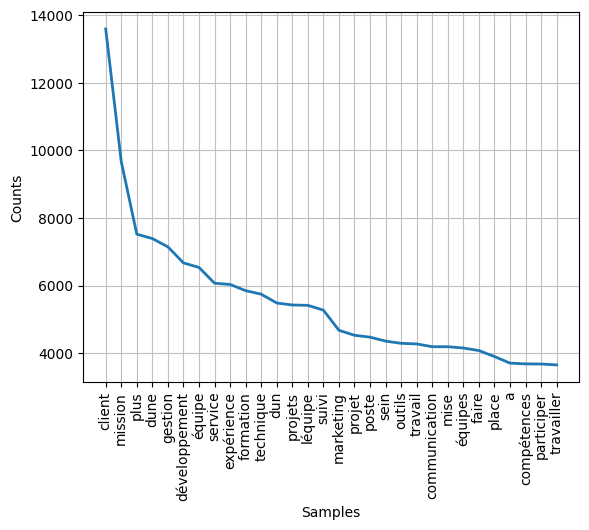

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Analyse des mots
all_words = [word for tokens in df_concat['Job_presentation_processed'] for word in tokens]
word_freq = FreqDist(all_words)


# Visualisation des mots fréquents
word_freq.plot(30, cumulative=False)
plt.show()

Visualisation des mots les plus fréquents

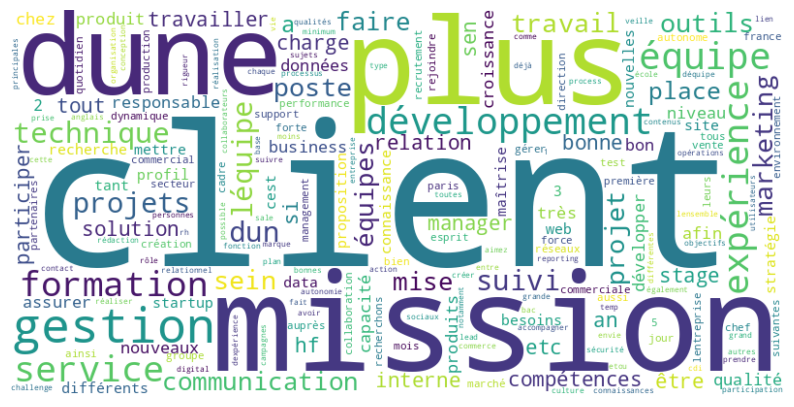

In [11]:
from wordcloud import WordCloud

# Générer un nuage de mots à partir de la distribution de fréquence des mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
# Analyse des phrases
df_concat['Sentence_length'] = df_concat['Job_presentation_processed'].apply(len)

# Phrase la plus courte
shortest_sentence = df_concat.loc[df_concat['Sentence_length'].idxmin(), 'Job_presentation_processed']
print("Phrase la plus courte:", ' '.join(shortest_sentence))

# Phrase la plus longue
longest_sentence = df_concat.loc[df_concat['Sentence_length'].idxmax(), 'Job_presentation_processed']
print("Phrase la plus longue:", ' '.join(longest_sentence))

# Longueur moyenne des phrases
avg_sentence_length = df_concat['Sentence_length'].mean()
print("Longueur moyenne des phrases:", avg_sentence_length)

Phrase la plus courte: candidats traités
Phrase la plus longue: customer success manager dutch french speaking french chez shopmium but transformer manière faire course afin daméliorer vie tous jours cette optique cherchons intégrer équipe customer success manager dont majeure partie activité dédiée marché belge présent belgique depuis 2018 lactivité belge pleine croissance challenge relever nombreux équipe customer success maximise valeur shopmium celle client garantissant plus grande satisfaction accélérant revenus gardiens voix lexpérience client travaillons manière transverse afin dassurer client coopération facile shopmium maximisons leurs investissements focalisons développement relation durables rejoindras équipe 6 customer success manager garant bon déroulement chaque campagne belgique france travaillant manière transverse assurer satisfaction client point contact client génèreras croissance optimisation rôle basé paris requiert niveau français irréprochable excellent niveau né

# Construction du modèle

## Encodage de IS_REMOTE

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encodage des étiquettes de classe
df_concat['IS_JOB_REMOTE_encoded'] = label_encoder.fit_transform(df_concat['IS_JOB_REMOTE'])

# Création du dictionnaire inversé
inverse_mapping = {label_encoder.transform([label])[0]: label for label in label_encoder.classes_}

# Affichage du dictionnaire inversé
print(inverse_mapping)


{0: 'fulltime', 1: 'no', 2: 'partial', 3: 'punctual'}


IMPORTANT !!

Il faudra voir si c'est pas mieux d'encoder de cette manière :

{0: 'no', 1: 'partial, 2: 'punctual', 3: 'fulltime'} ou carrément avec un autre encodeur.

In [16]:
df_concat.head()

,JOB_NAME,JOB_DESCRIPTION,PROFILE,IS_JOB_REMOTE,Job_presentation,JOB_NAME_length,JOB_DESCRIPTION_length,PROFILE_length,Job_presentation_length,langue,Job_presentation_processed,Sentence_length,Job_Name_length,Job_Description_length,IS_JOB_REMOTE_encoded
0,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,**DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...,Vous recherchez un projet innovant et excitant...,no,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,50,2053,992,3097,fr,"[stagiaire, ingenieur, generaliste, projet, er...",251,50,2053,1
1,Responsable d'agence / City Manager (H/F),Pour continuer à offrir un service de qualité ...,* Bac+3 minimum\n \n* Une première expérien...,punctual,Responsable d'agence / City Manager (H/F) Pour...,41,1097,714,1854,fr,"[responsable, dagence, city, manager, hf, cont...",149,41,1097,3
2,Développeur(se) Confirmé(e) Fullstack JS (Node...,* Conception et choix d’architecture\r\n* Déve...,* Formation en informatique ou en ingénierie o...,partial,Développeur(se) Confirmé(e) Fullstack JS (Node...,62,610,311,985,fr,"[développeurse, confirmée, fullstack, j, nodej...",93,62,610,2
3,💡 Business Consultant(e) MOA - Transformation...,**Consultant Junior en transformation digitale...,Vous avez le sens de l’analyse et l’envie de r...,punctual,💡 Business Consultant(e) MOA - Transformation...,117,639,608,1366,fr,"[business, consultante, moa, transformation, d...",114,117,639,3
4,Junior Business Developer,* Contrat : Stage\r\n* Temps de travail : Temp...,**Compétences requises :**\r\n\r\n* Fibre comm...,no,Junior Business Developer * Contrat : Stage\r\...,25,270,470,767,fr,"[junior, business, developer, contrat, stage, ...",74,25,270,1


## train/test

In [17]:
# Diviser les données en ensembles d'entraînement et de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_concat['Job_presentation_processed'], df_concat['IS_JOB_REMOTE_encoded'], test_size=0.2, random_state=42)


## Chargement du modèle


# 5/ TF-IDF

## Vectorization des mots

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Créer une instance du vecteur TF-IDF
tfidf = TfidfVectorizer()

# Transformer les données d'entraînement en vecteurs TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transformer les données de test en vecteurs TF-IDF
X_test_tfidf = tfidf.transform(X_test_text)

## Regression Logistique

In [19]:
# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de test
y_pred = model.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import accuracy_score


# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle : {:.2f}".format(accuracy))

Exactitude du modèle : 0.65


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print(confusion_mat)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une heatmap de la matrice de confusion
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')

# Ajouter des labels aux axes x et y
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')

# Afficher la heatmap
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)
y_pred_rf = model_rf.predict(X_test_tfidf)

# Calculer l'accuracy et l'ajouter à la liste des scores

accuracy_RF = accuracy_score(y_test, y_pred_rf)
accuracy_scores.append(accuracy_RF)

In [ ]:
accuracy_RF

## XGBoost

In [ ]:
# Créer un modèle XGBoost

import xgboost as xgb


model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = model_xgb.predict(X_test_tfidf)

accuracy_XGB = accuracy_score(y_test, y_pred_xgb)

In [ ]:
accuracy_XGB

## SVM

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_tfidf, y_train)
y_pred_svm = model_svm.predict(X_test_tfidf)

# Calculer l'accuracy et l'ajouter à la liste des scores

accuracy_SVM = accuracy_score(y_test, y_pred_svm)
accuracy_scores.append(accuracy_SVM)

In [ ]:
accuracy_SVM

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb.predict(X_test_tfidf)

# Calculer l'accuracy et l'ajouter à la liste des scores
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_scores.append(accuracy_nb)

In [ ]:
accuracy_nb

## Balanced Random Forest Classifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

model_br = BalancedRandomForestClassifier()
model_br.fit(X_train_tfidf, y_train)
y_pred_br = model_br.predict(X_test_tfidf)

 # Calculer l'accuracy et l'ajouter à la liste des scores
accuracy_BRFC = accuracy_score(y_test, y_pred_br)
accuracy_scores.append(accuracy_BRFC)

In [ ]:
accuracy_BRFC

# 6/ TF-IDF pour plusieurs valleurs de n

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Tester différentes valeurs de n
n_values = [1, 2, 3, 4, 5]  

accuracy_scores = []

for n in n_values:
    # Créer une instance du vecteur TF-IDF avec la valeur de n correspondante
    tfidf = TfidfVectorizer(ngram_range=(1, n))

    # Transformer les données d'entraînement en vecteurs TF-IDF
    X_train_tfidf = tfidf.fit_transform(X_train_text)

    # Transformer les données de test en vecteurs TF-IDF
    X_test_tfidf = tfidf.transform(X_test_text)

    # Créer un modèle de régression logistique
    model = LogisticRegression()

    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train_tfidf, y_train)

    # Prédire les étiquettes sur les données de test
    y_pred = model.predict(X_test_tfidf)

    # Calculer l'accuracy et l'ajouter à la liste des scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Tracer le graphe résumant les résultats
plt.plot(n_values, accuracy_scores, marker='o')
plt.xlabel('Valeur de n')
plt.ylabel('Accuracy')
plt.title('Précision en fonction de la valeur de n')
plt.show()


# 7/ Word Embedding